In [1]:
%pip install sklearn

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 23.8 MB 5.1 MB/s eta 0:00:011
     |████████████████████████████████| 27.3 MB 4.2 MB/s eta 0:00:01
     |████████████████████████████████| 15.4 MB 4.8 MB/s eta 0:00:01
     |████████████████████████████████| 302 kB 3.5 MB/s eta 0:00:01
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1316 sha256=b961a0572d51e736c74bc5871bef1e8935d22d6736fc4d15494addd434daeb86
  Stored in directory: /home/nmramorov/.cache/pip/wheels/e4/7b/98/b6466d71b8d738a0c547008b9eb39bf8676d1ff6ca4b22af1c
Successfully built sklearn
Note: you may need to restart the kernel to use updated packages.


In [58]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics as m
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
dataset = pd.read_csv('bioresponse.csv')
dataset.head

<bound method NDFrame.head of       Activity        D1        D2    D3   D4        D5        D6        D7  \
0            1  0.000000  0.497009  0.10  0.0  0.132956  0.678031  0.273166   
1            1  0.366667  0.606291  0.05  0.0  0.111209  0.803455  0.106105   
2            1  0.033300  0.480124  0.00  0.0  0.209791  0.610350  0.356453   
3            1  0.000000  0.538825  0.00  0.5  0.196344  0.724230  0.235606   
4            0  0.100000  0.517794  0.00  0.0  0.494734  0.781422  0.154361   
...        ...       ...       ...   ...  ...       ...       ...       ...   
3746         1  0.033300  0.506409  0.10  0.0  0.209887  0.633426  0.297659   
3747         1  0.133333  0.651023  0.15  0.0  0.151154  0.766505  0.170876   
3748         0  0.200000  0.520564  0.00  0.0  0.179949  0.768785  0.177341   
3749         1  0.100000  0.765646  0.00  0.0  0.536954  0.634936  0.342713   
3750         0  0.133333  0.533952  0.00  0.0  0.347966  0.757971  0.230667   

            D8       

In [5]:
dataset

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,1,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,...,0,0,0,0,0,0,0,0,0,0
1,1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,...,1,1,1,1,0,1,0,0,1,0
2,1,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,...,0,0,0,0,0,0,0,0,0,0
3,1,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,...,0,0,0,0,0,0,0,0,0,0
4,0,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3746,1,0.033300,0.506409,0.10,0.0,0.209887,0.633426,0.297659,0.376124,0.727093,...,0,0,0,0,0,0,0,0,0,0
3747,1,0.133333,0.651023,0.15,0.0,0.151154,0.766505,0.170876,0.404546,0.787935,...,0,0,1,0,1,0,1,0,0,0
3748,0,0.200000,0.520564,0.00,0.0,0.179949,0.768785,0.177341,0.471179,0.872241,...,0,0,0,0,0,0,0,0,0,0
3749,1,0.100000,0.765646,0.00,0.0,0.536954,0.634936,0.342713,0.447162,0.672689,...,0,0,0,0,0,0,0,0,0,0


In [4]:
y = np.array([dataset['Activity']])
y = y.reshape((y.shape[1]))

In [5]:
X = np.array([dataset.drop(columns='Activity')])
X = X.reshape((X.shape[1], X.shape[2]))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [59]:
deep_decision_tree = DecisionTreeClassifier(max_depth=10)
deep_decision_tree = deep_decision_tree.fit(X_train, y_train)

short_decision_tree = DecisionTreeClassifier(max_depth=2)
short_decision_tree = short_decision_tree.fit(X_train, y_train)

deep_random_forest = RandomForestClassifier(n_estimators=50, max_depth=15, random_state=1)
deep_random_forest = deep_random_forest.fit(X_train, y_train)

short_random_forest = RandomForestClassifier(n_estimators=50, max_depth=2, random_state=1)
short_random_forest = short_random_forest.fit(X_train, y_train)

In [35]:
def show_metrics(test_label, classifier_results, classifier):
    print(f'Accuracy for the {str(classifier)}: {m.accuracy_score(test_label, classifier_results):.2f}')
    print(f'Precision for the {str(classifier)}: {m.precision_score(test_label, classifier_results):.2f}')
    print(f'Recall for the {str(classifier)}: {m.recall_score(test_label, classifier_results):.2f}')
    print(f'F1 score for the {str(classifier)}: {m.f1_score(test_label, classifier_results):.2f}')
    print(f'Log-loss for the {str(classifier)}: {m.log_loss(test_label, classifier_results):.2f}\n')
    
    
def plot_precision_recall(y_test, y_out_proba, classifier):
    prec, rec, thresh = m.precision_recall_curve(y_test, y_out_proba[:,1])
    plt.figure(figsize=(9, 6))
    plt.grid()
    plt.plot(thresh, prec[:-1], label="Precision")
    plt.plot(thresh, rec[:-1], label="Recall")
    plt.xlabel(f"Threshold",fontsize = 15)
    plt.title(f'Precision-Recall curve for {str(classifier)}',fontsize = 15)
    plt.legend(fontsize = 15)
    
    
def plot_roc_curve(y_test, y_out_proba, roc_auc, classifier):
    fpr, tpr, thr = m.roc_curve(y_test, y_out_proba[:,1])
    plt.figure(figsize = (9,6))
    plt.plot(fpr, tpr, label=u'ROC \n'+'ROC AUC = ' + str(round(roc_auc,2)))
    plt.grid()
    plt.xlabel("false positive rate",fontsize = 15)
    plt.ylabel("true positive rate",fontsize = 15)
    plt.title(f"ROC curve for {str(classifier)}",fontsize = 15)
    plt.legend(fontsize = 15)
    

def classify(classifiers, X_test, y_test):
    for classifier in classifiers:
        result = classifier.predict(X_test)
        classifier_proba = classifier.predict_proba(X_test)
        roc_auc = m.roc_auc_score(y_test, result)
        
        show_metrics(y_test, result, classifier)
        plot_precision_recall(y_test, classifier_proba, classifier)
        plot_roc_curve(y_test, classifier_proba, roc_auc, classifier)

Accuracy for the DecisionTreeClassifier(max_depth=10): 0.77
Precision for the DecisionTreeClassifier(max_depth=10): 0.77
Recall for the DecisionTreeClassifier(max_depth=10): 0.81
F1 score for the DecisionTreeClassifier(max_depth=10): 0.79
Log-loss for the DecisionTreeClassifier(max_depth=10): 7.88

Accuracy for the DecisionTreeClassifier(max_depth=2): 0.74
Precision for the DecisionTreeClassifier(max_depth=2): 0.72
Recall for the DecisionTreeClassifier(max_depth=2): 0.84
F1 score for the DecisionTreeClassifier(max_depth=2): 0.78
Log-loss for the DecisionTreeClassifier(max_depth=2): 8.87

Accuracy for the RandomForestClassifier(max_depth=15, n_estimators=50, random_state=1): 0.78
Precision for the RandomForestClassifier(max_depth=15, n_estimators=50, random_state=1): 0.78
Recall for the RandomForestClassifier(max_depth=15, n_estimators=50, random_state=1): 0.81
F1 score for the RandomForestClassifier(max_depth=15, n_estimators=50, random_state=1): 0.79
Log-loss for the RandomForestClass

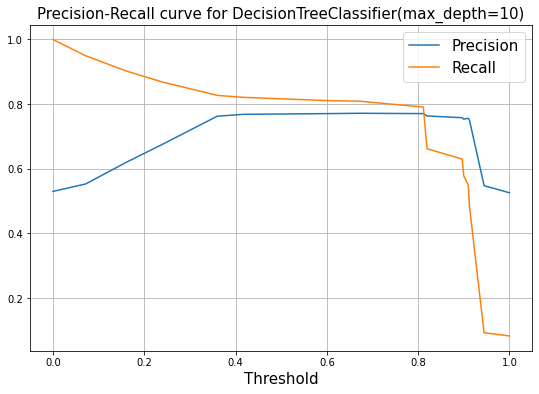

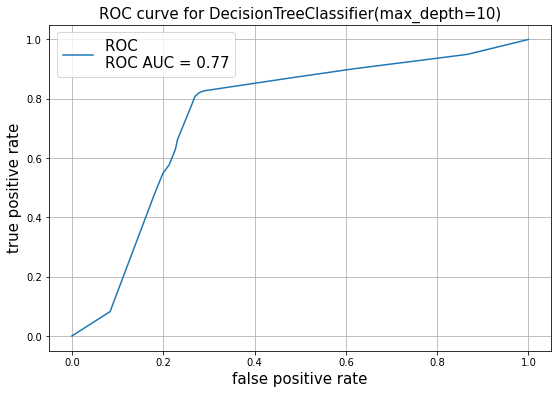

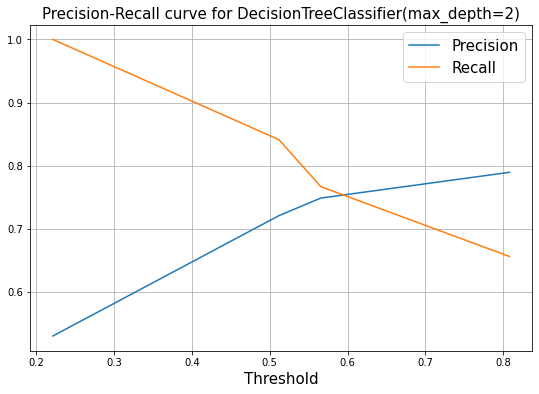

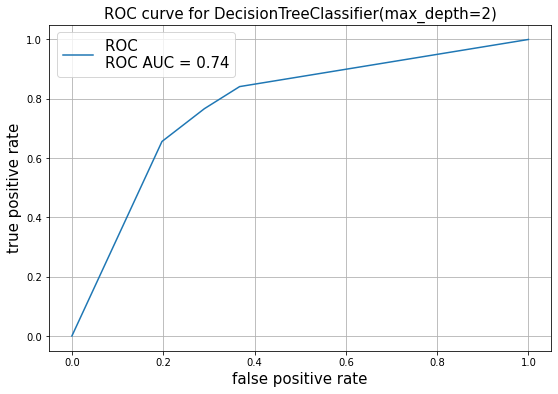

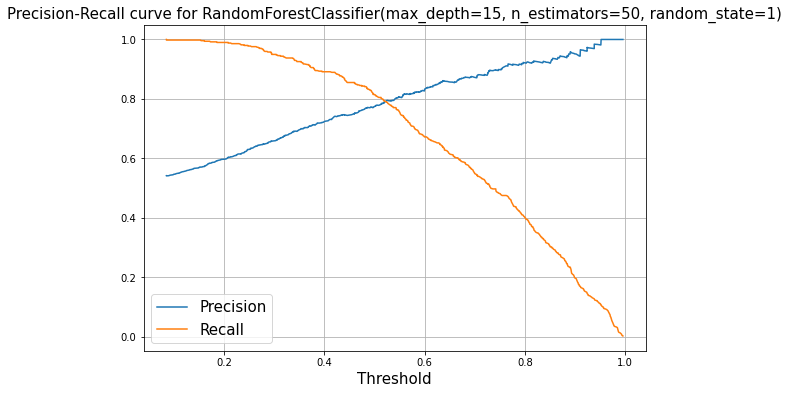

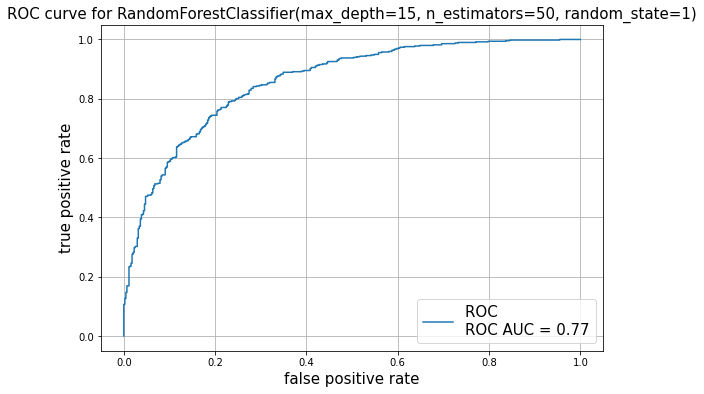

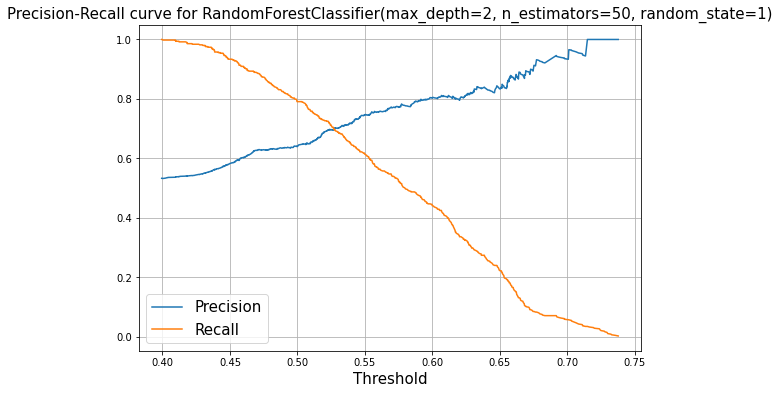

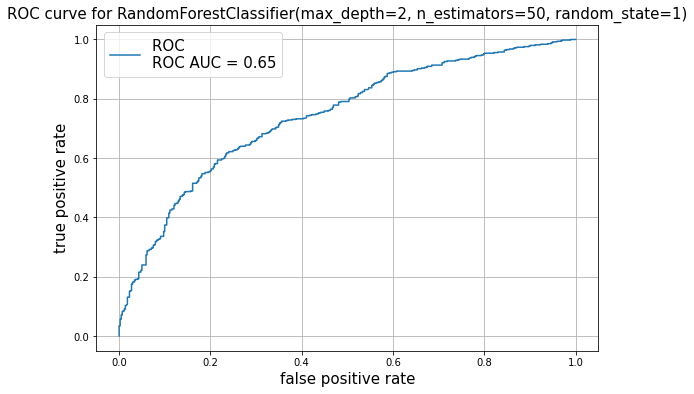

In [60]:
classifiers = (deep_decision_tree, short_decision_tree, deep_random_forest, short_random_forest)
classify(classifiers, X_test, y_test)

In [38]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

Accuracy for the KNeighborsClassifier(n_neighbors=2): 0.74
Precision for the KNeighborsClassifier(n_neighbors=2): 0.83
Recall for the KNeighborsClassifier(n_neighbors=2): 0.64
F1 score for the KNeighborsClassifier(n_neighbors=2): 0.72
Log-loss for the KNeighborsClassifier(n_neighbors=2): 9.06

Accuracy for the KNeighborsClassifier(n_neighbors=3): 0.76
Precision for the KNeighborsClassifier(n_neighbors=3): 0.75
Recall for the KNeighborsClassifier(n_neighbors=3): 0.80
F1 score for the KNeighborsClassifier(n_neighbors=3): 0.78
Log-loss for the KNeighborsClassifier(n_neighbors=3): 8.43

Accuracy for the KNeighborsClassifier(n_neighbors=4): 0.75
Precision for the KNeighborsClassifier(n_neighbors=4): 0.79
Recall for the KNeighborsClassifier(n_neighbors=4): 0.71
F1 score for the KNeighborsClassifier(n_neighbors=4): 0.75
Log-loss for the KNeighborsClassifier(n_neighbors=4): 8.76

Accuracy for the KNeighborsClassifier(): 0.75
Precision for the KNeighborsClassifier(): 0.74
Recall for the KNeighb

<ipython-input-35-f4abb036d242>:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(9, 6))


Accuracy for the KNeighborsClassifier(n_neighbors=13): 0.73
Precision for the KNeighborsClassifier(n_neighbors=13): 0.72
Recall for the KNeighborsClassifier(n_neighbors=13): 0.79
F1 score for the KNeighborsClassifier(n_neighbors=13): 0.76
Log-loss for the KNeighborsClassifier(n_neighbors=13): 9.32

Accuracy for the KNeighborsClassifier(n_neighbors=14): 0.72
Precision for the KNeighborsClassifier(n_neighbors=14): 0.73
Recall for the KNeighborsClassifier(n_neighbors=14): 0.75
F1 score for the KNeighborsClassifier(n_neighbors=14): 0.74
Log-loss for the KNeighborsClassifier(n_neighbors=14): 9.68



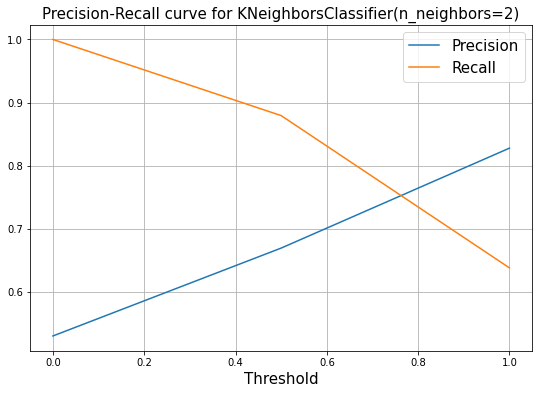

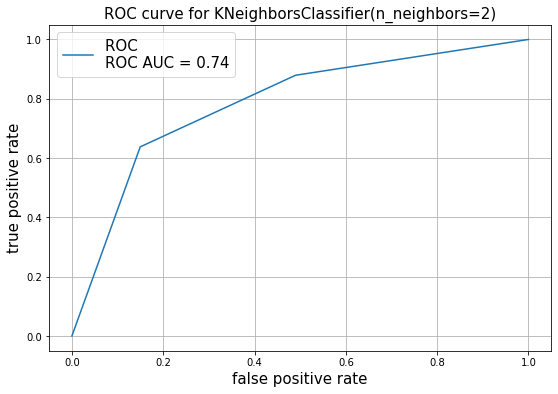

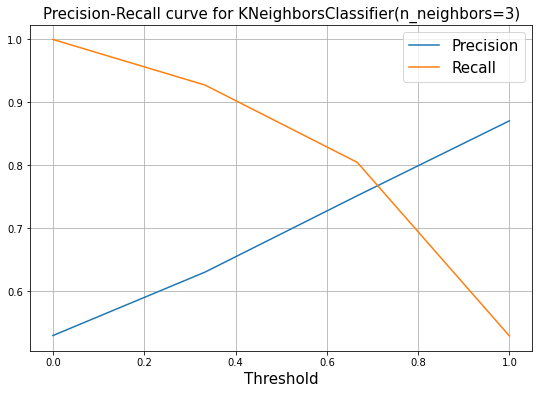

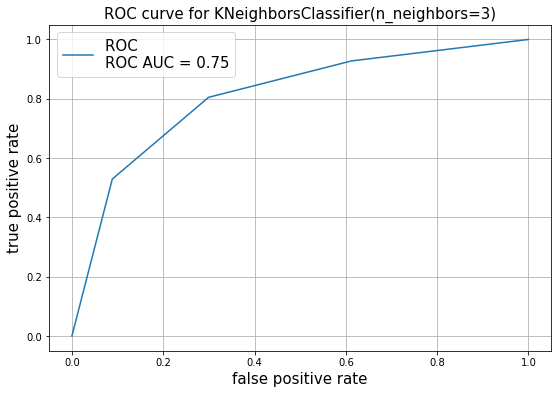

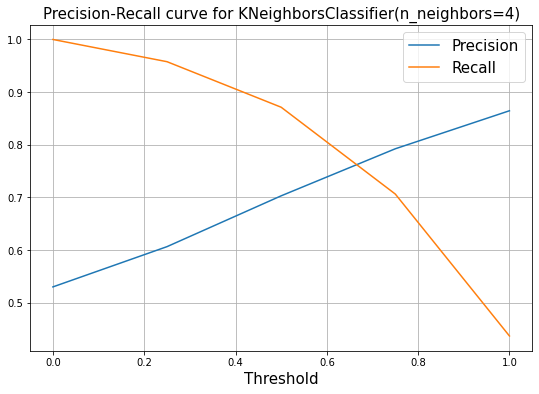

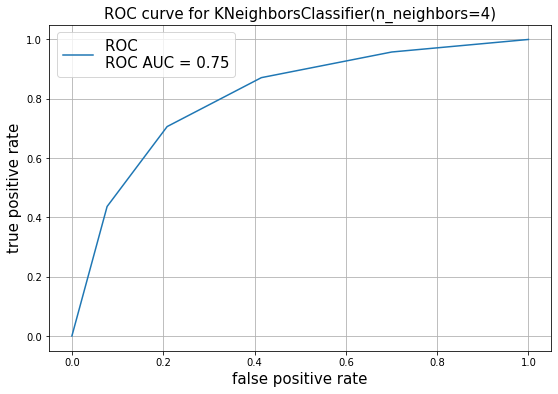

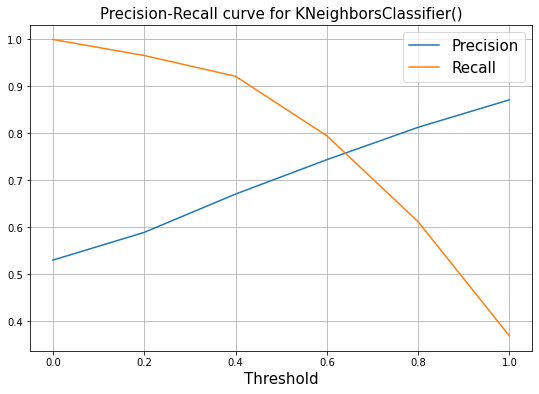

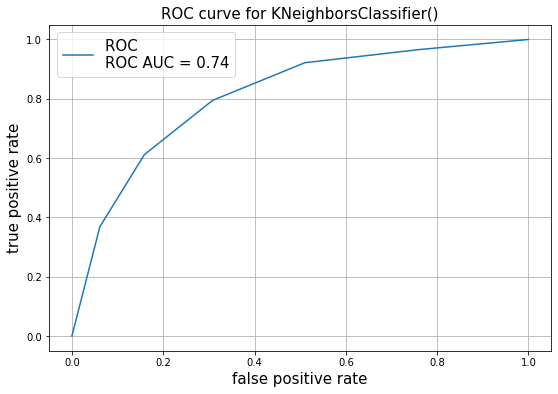

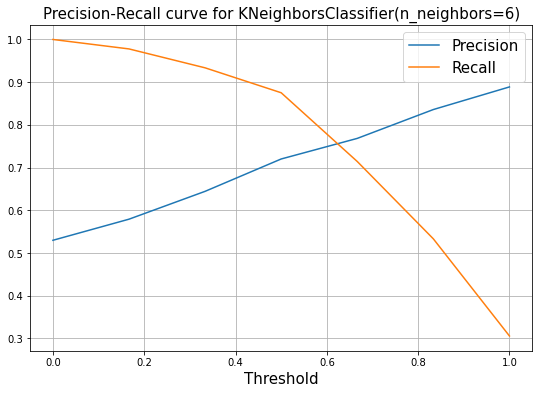

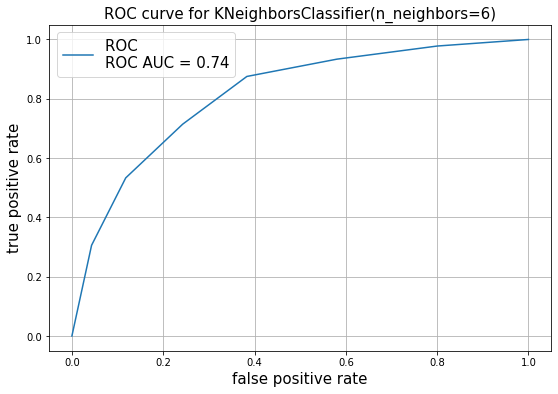

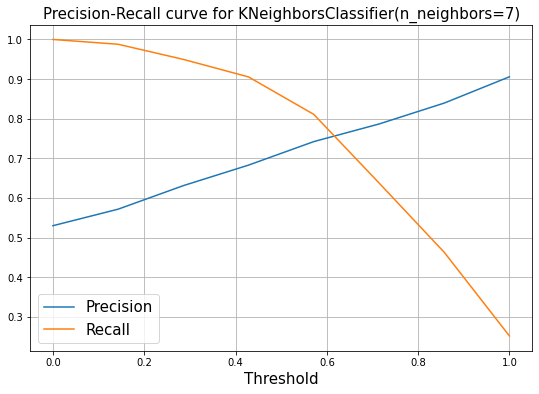

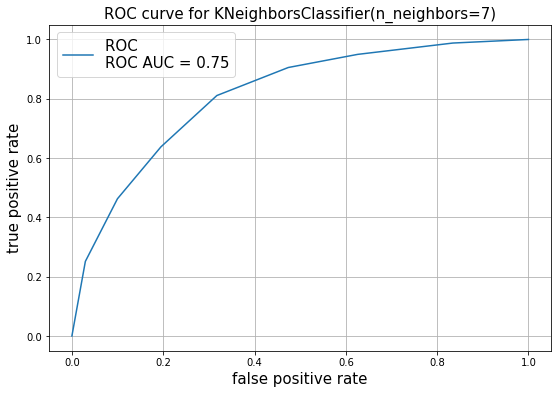

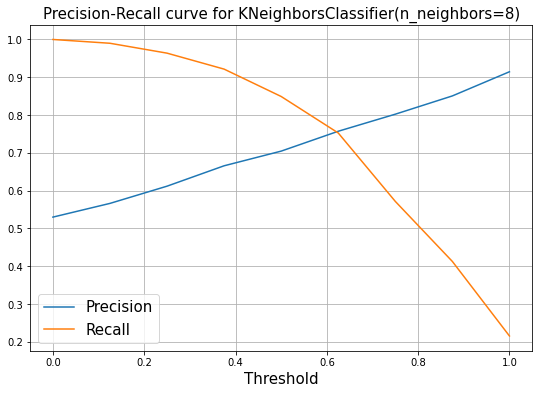

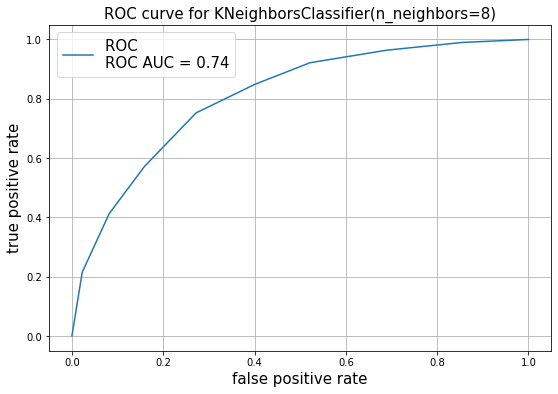

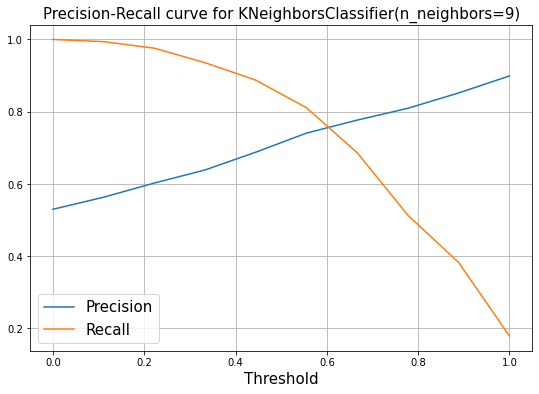

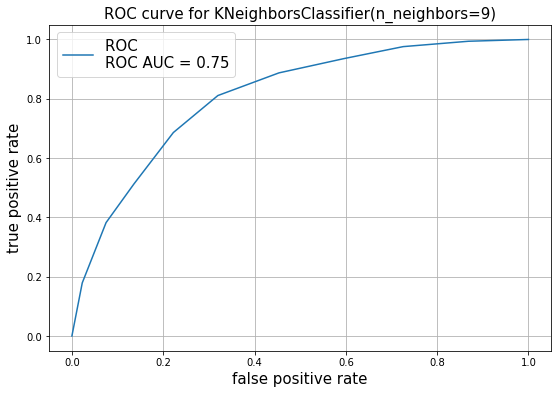

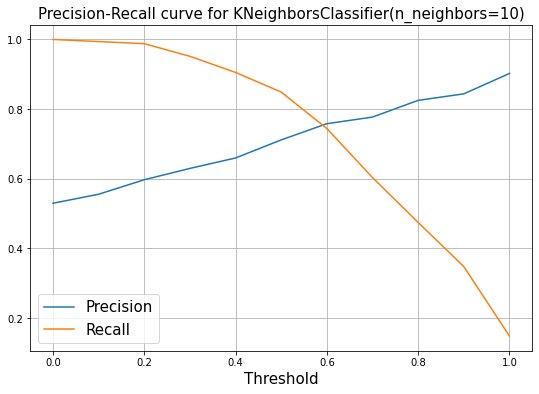

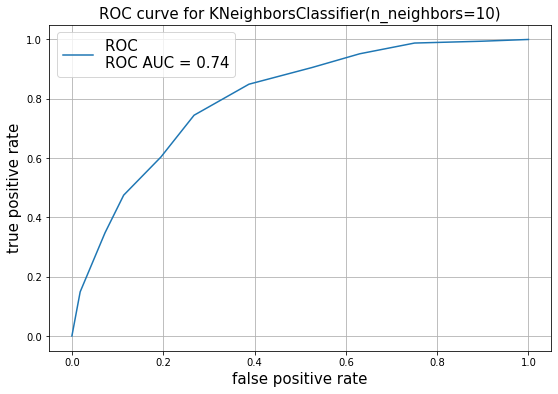

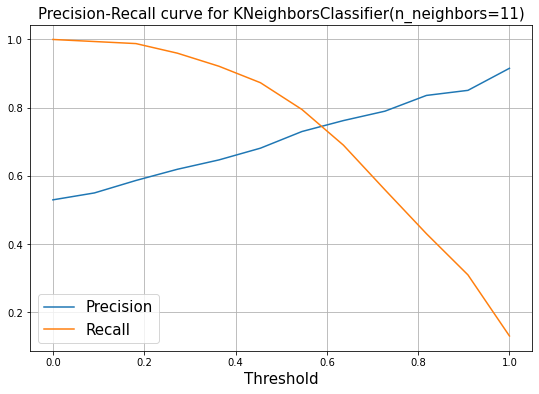

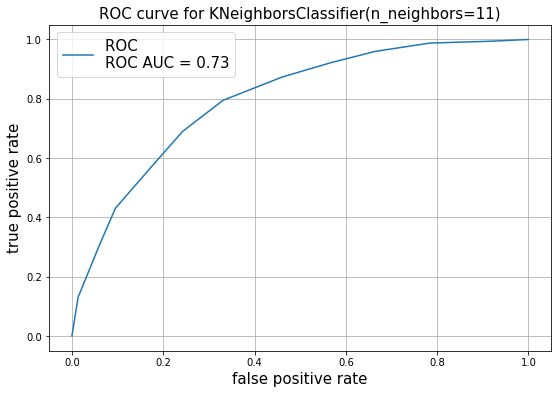

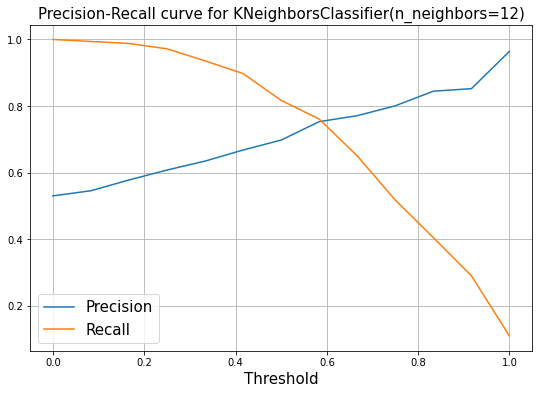

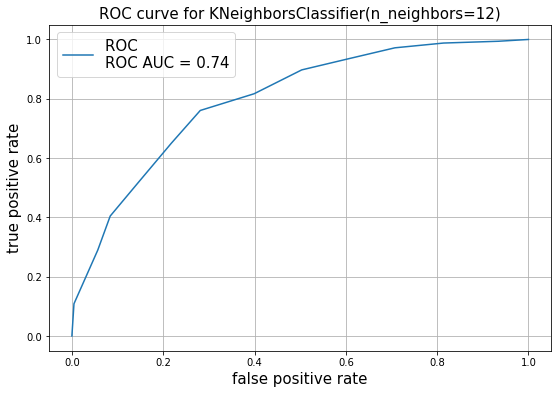

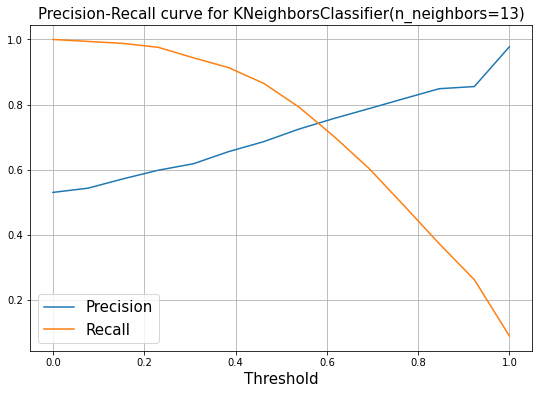

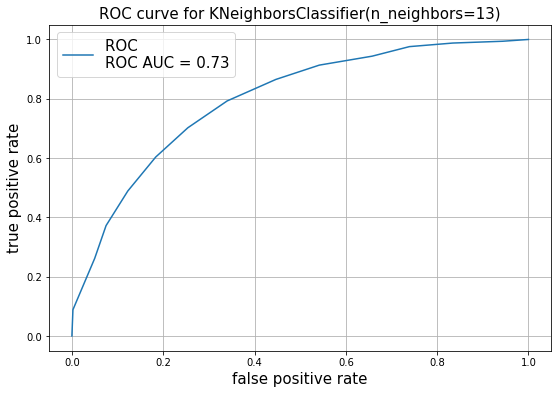

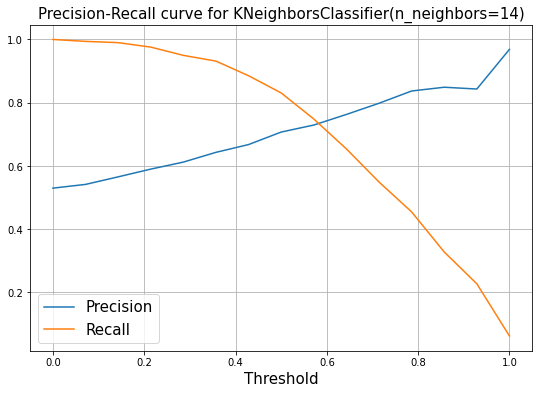

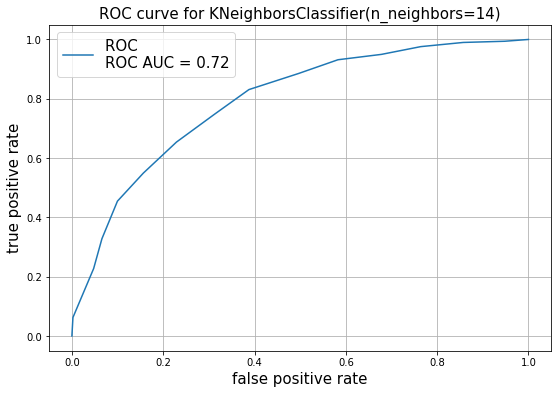

In [42]:
knns = []
for i in range(2,15):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn = knn.fit(X_train, y_train)
    knns.append(knn)

classify(knns, X_test, y_test)

Accuracy for the SVC(C=0.1, probability=True): 0.67
Precision for the SVC(C=0.1, probability=True): 0.65
Recall for the SVC(C=0.1, probability=True): 0.81
F1 score for the SVC(C=0.1, probability=True): 0.72
Log-loss for the SVC(C=0.1, probability=True): 11.49

Accuracy for the SVC(C=0.2, probability=True): 0.72
Precision for the SVC(C=0.2, probability=True): 0.70
Recall for the SVC(C=0.2, probability=True): 0.83
F1 score for the SVC(C=0.2, probability=True): 0.76
Log-loss for the SVC(C=0.2, probability=True): 9.54

Accuracy for the SVC(C=0.30000000000000004, probability=True): 0.76
Precision for the SVC(C=0.30000000000000004, probability=True): 0.75
Recall for the SVC(C=0.30000000000000004, probability=True): 0.82
F1 score for the SVC(C=0.30000000000000004, probability=True): 0.78
Log-loss for the SVC(C=0.30000000000000004, probability=True): 8.36

Accuracy for the SVC(C=0.4, probability=True): 0.77
Precision for the SVC(C=0.4, probability=True): 0.76
Recall for the SVC(C=0.4, probabil

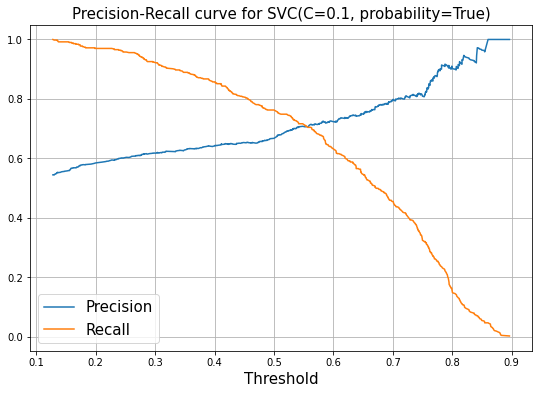

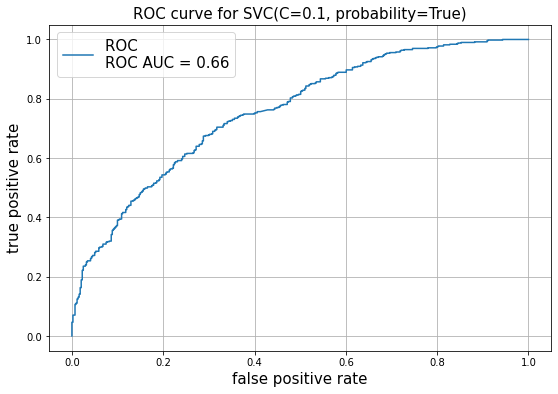

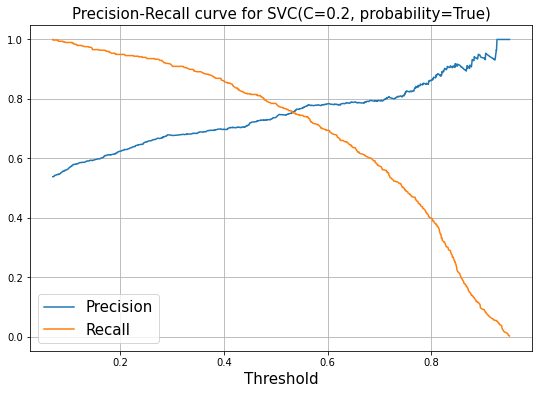

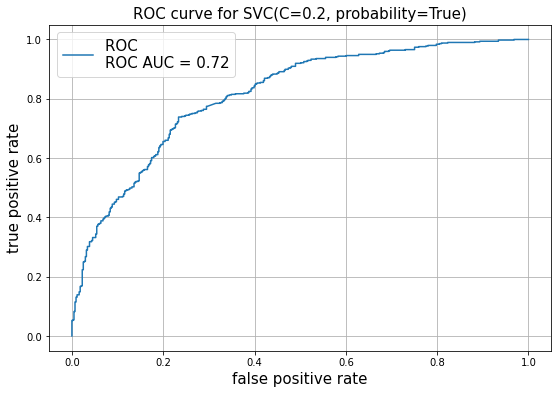

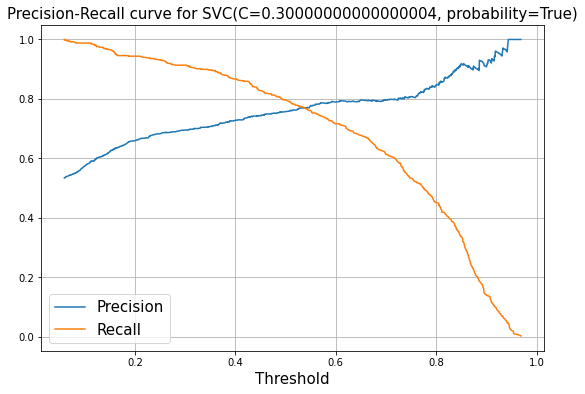

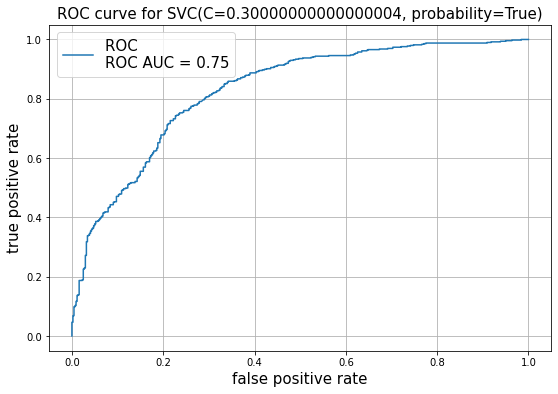

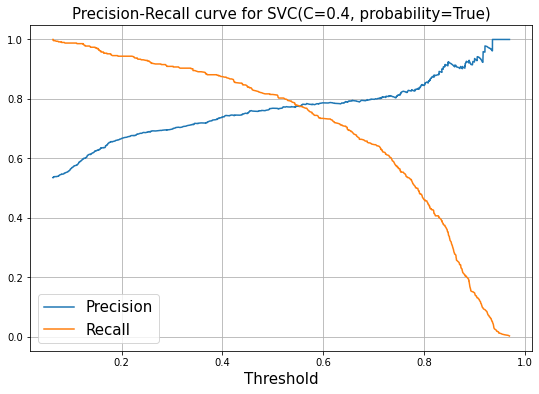

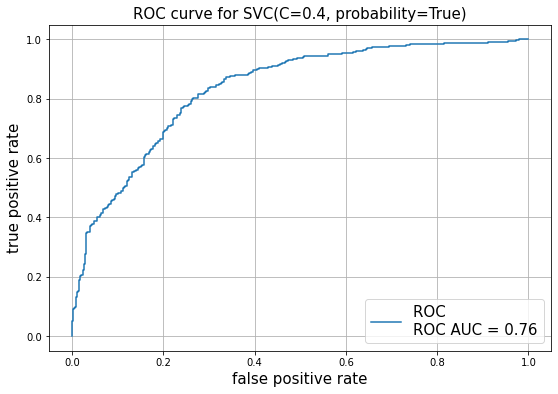

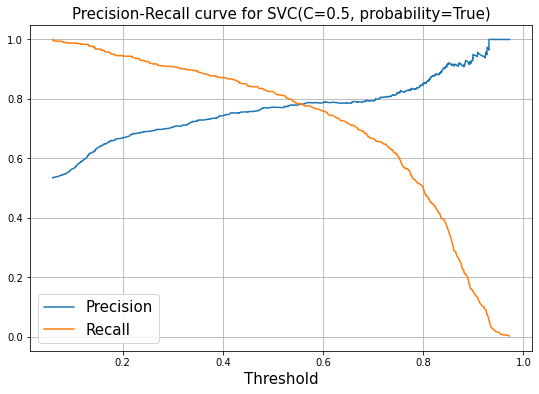

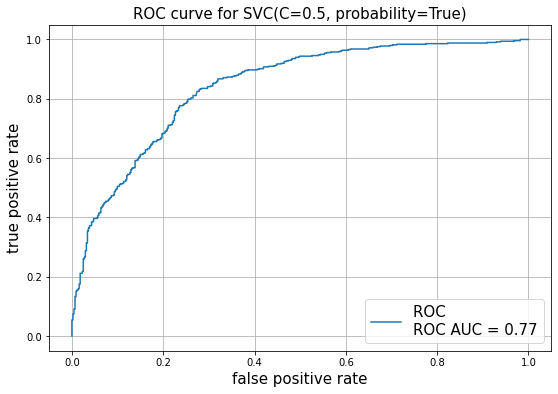

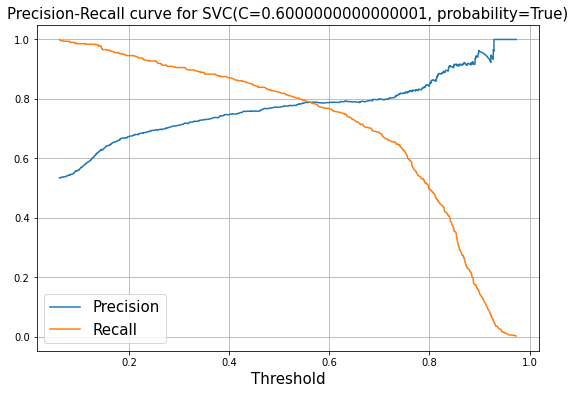

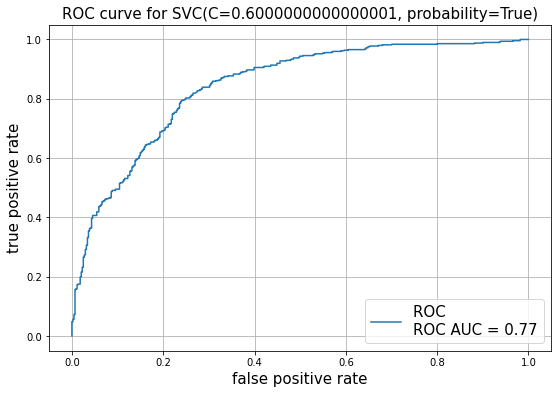

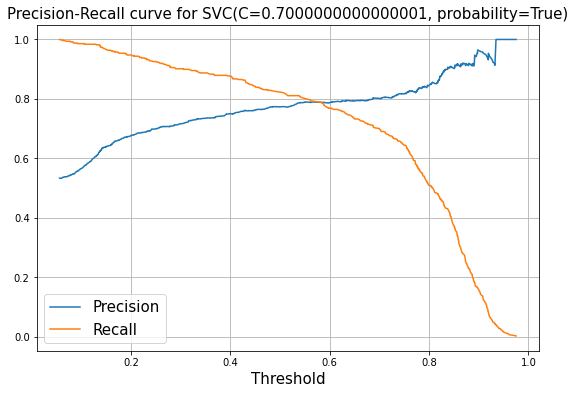

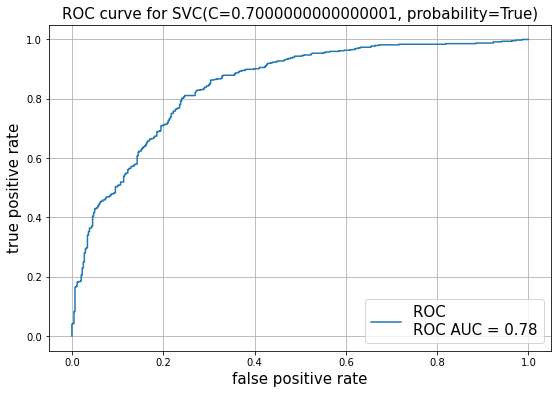

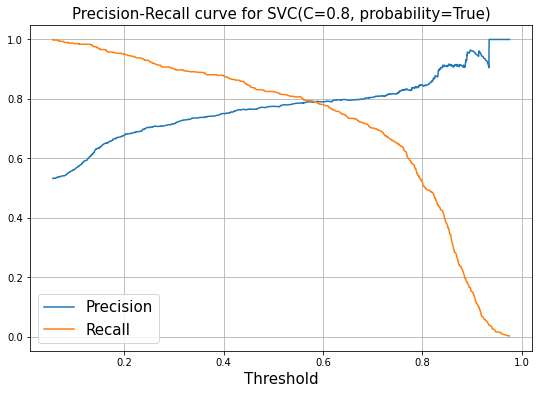

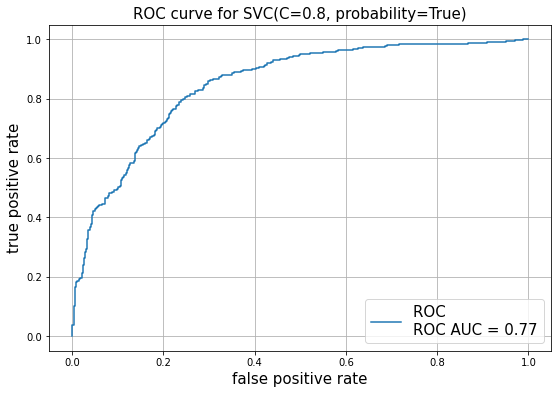

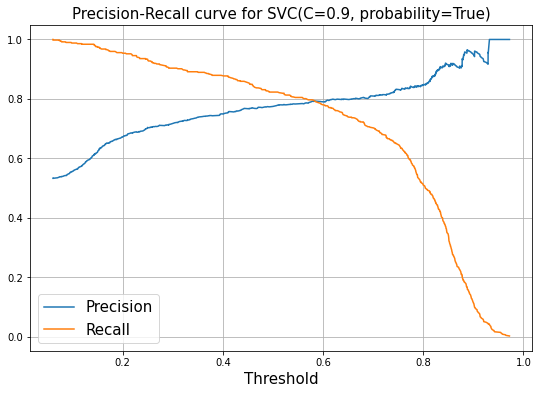

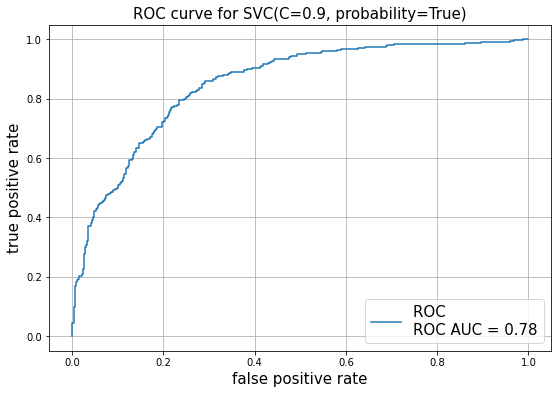

In [47]:
svms = []

for c in range(1, 10):
    c = c * 0.1
    svm = SVC(C=c, probability=True)
    svm = svm.fit(X_train, y_train)
    svms.append(svm)

classify(svms, X_test, y_test)

Accuracy for the DecisionTreeClassifier(max_depth=1): 0.73
Precision for the DecisionTreeClassifier(max_depth=1): 0.75
Recall for the DecisionTreeClassifier(max_depth=1): 0.73
F1 score for the DecisionTreeClassifier(max_depth=1): 0.74
Log-loss for the DecisionTreeClassifier(max_depth=1): 9.39

Accuracy for the DecisionTreeClassifier(max_depth=2): 0.74
Precision for the DecisionTreeClassifier(max_depth=2): 0.72
Recall for the DecisionTreeClassifier(max_depth=2): 0.84
F1 score for the DecisionTreeClassifier(max_depth=2): 0.78
Log-loss for the DecisionTreeClassifier(max_depth=2): 8.87

Accuracy for the DecisionTreeClassifier(max_depth=3): 0.75
Precision for the DecisionTreeClassifier(max_depth=3): 0.76
Recall for the DecisionTreeClassifier(max_depth=3): 0.79
F1 score for the DecisionTreeClassifier(max_depth=3): 0.77
Log-loss for the DecisionTreeClassifier(max_depth=3): 8.54

Accuracy for the DecisionTreeClassifier(max_depth=4): 0.76
Precision for the DecisionTreeClassifier(max_depth=4): 0

<ipython-input-35-f4abb036d242>:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(9, 6))


Accuracy for the DecisionTreeClassifier(max_depth=13): 0.75
Precision for the DecisionTreeClassifier(max_depth=13): 0.76
Recall for the DecisionTreeClassifier(max_depth=13): 0.79
F1 score for the DecisionTreeClassifier(max_depth=13): 0.77
Log-loss for the DecisionTreeClassifier(max_depth=13): 8.54

Accuracy for the DecisionTreeClassifier(max_depth=14): 0.76
Precision for the DecisionTreeClassifier(max_depth=14): 0.76
Recall for the DecisionTreeClassifier(max_depth=14): 0.80
F1 score for the DecisionTreeClassifier(max_depth=14): 0.78
Log-loss for the DecisionTreeClassifier(max_depth=14): 8.40



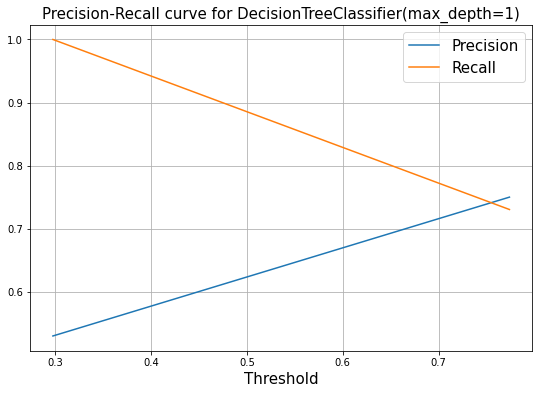

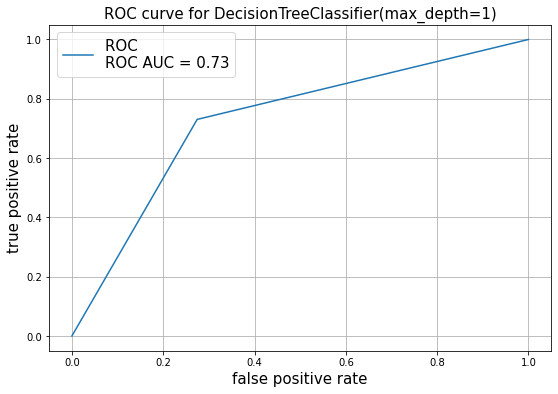

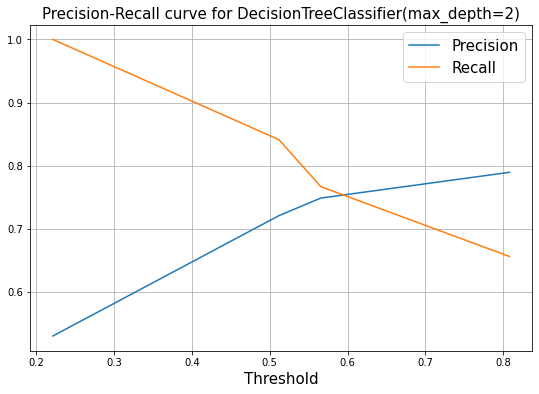

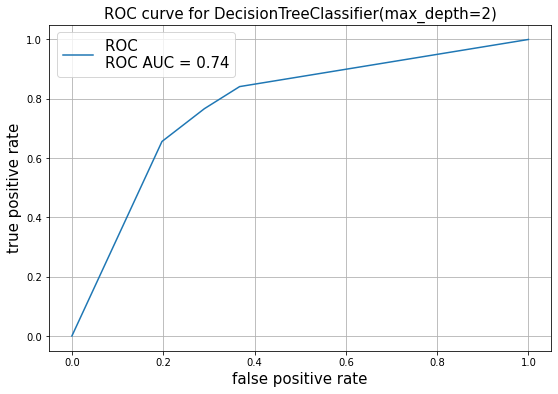

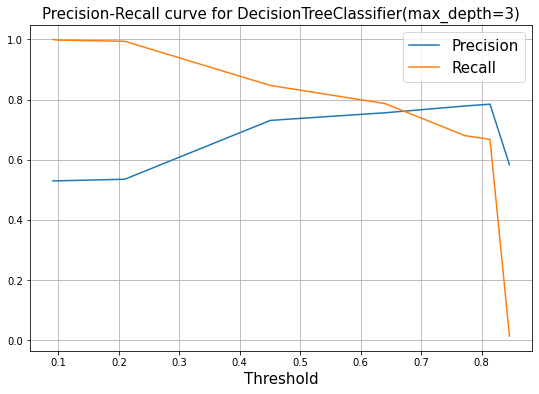

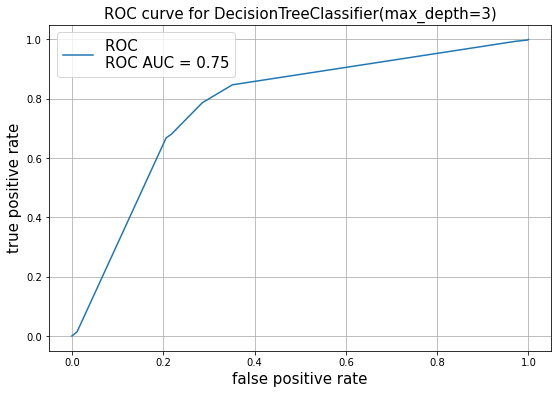

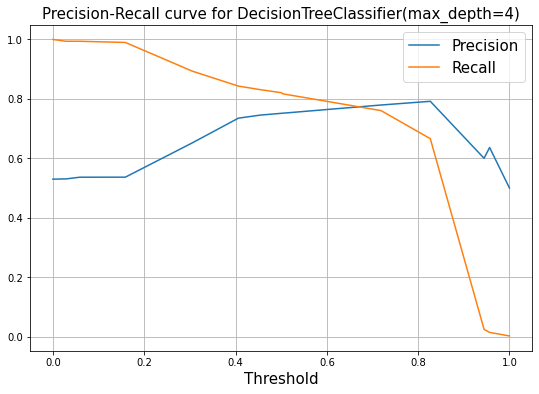

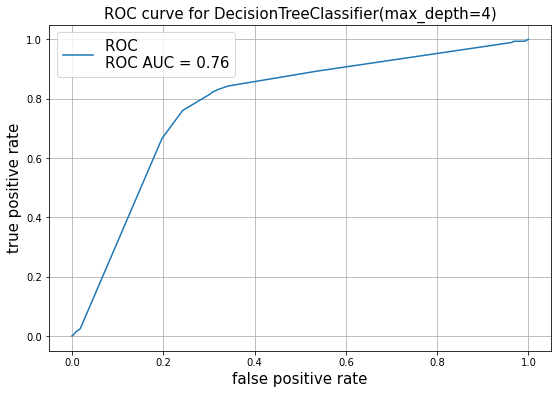

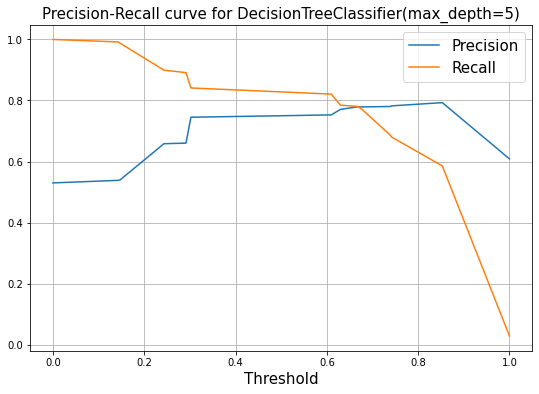

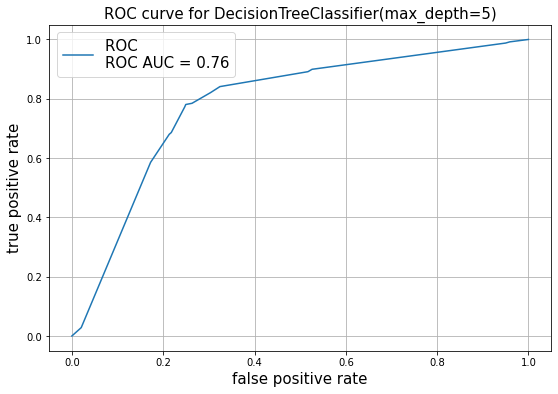

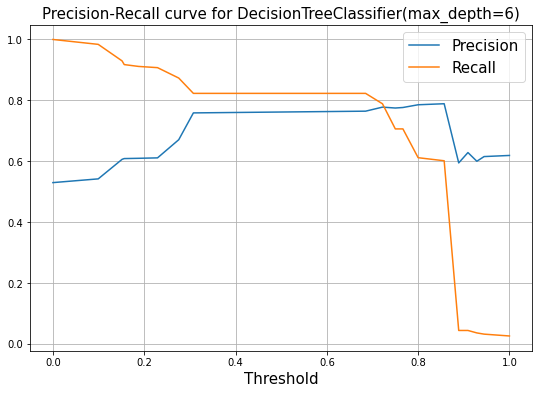

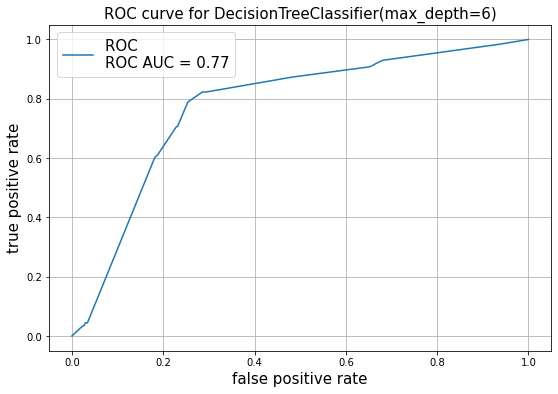

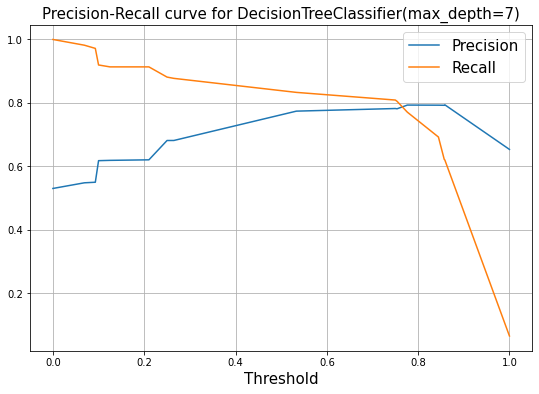

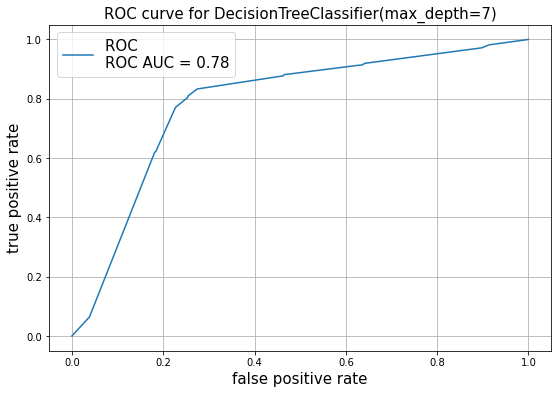

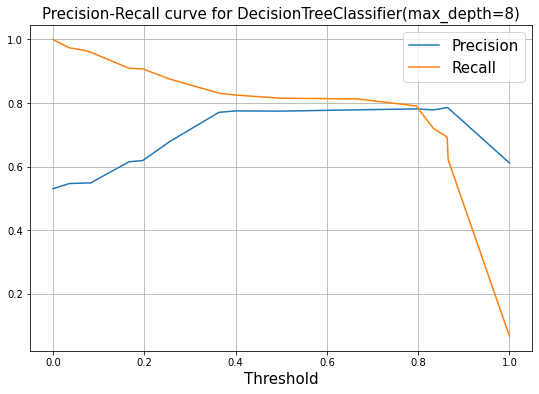

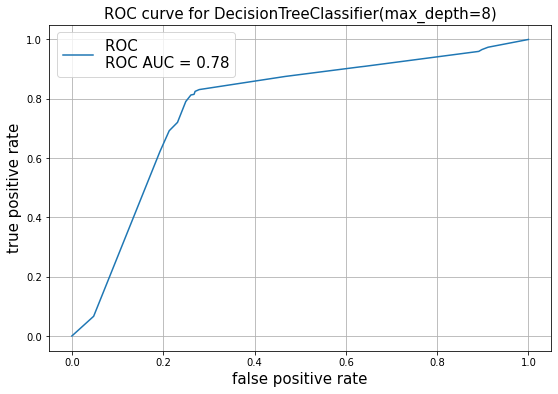

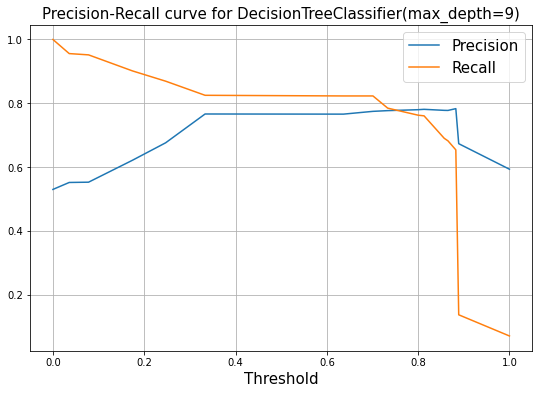

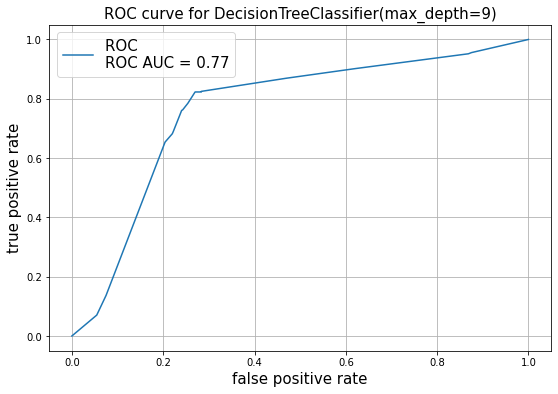

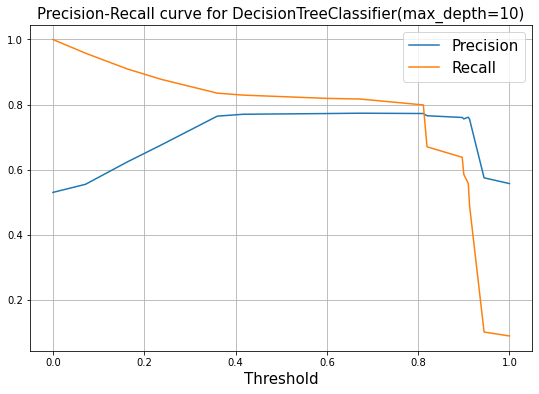

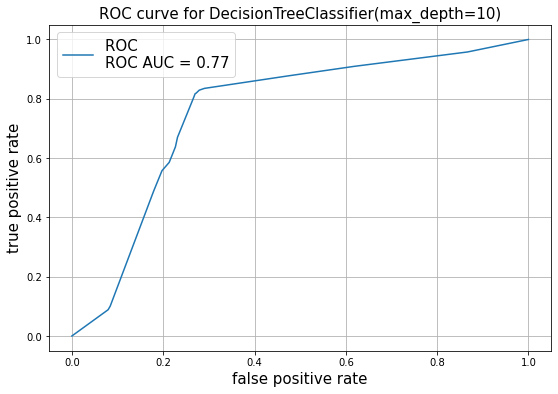

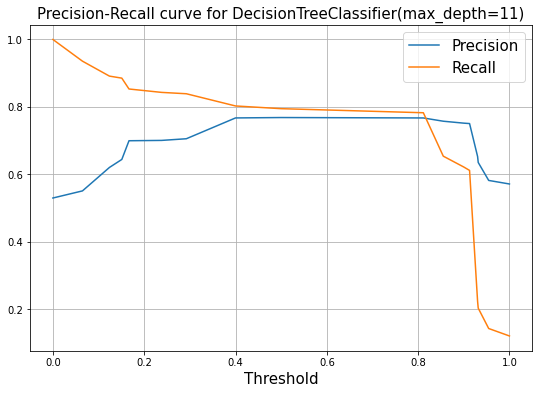

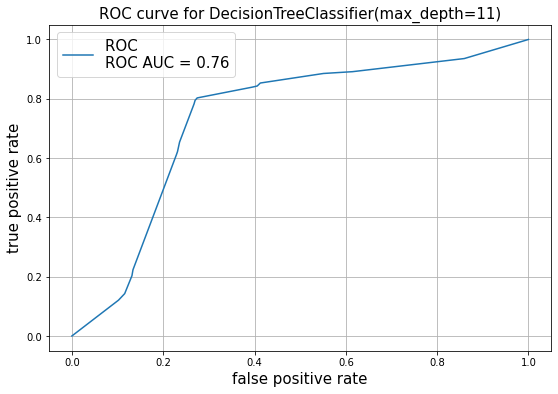

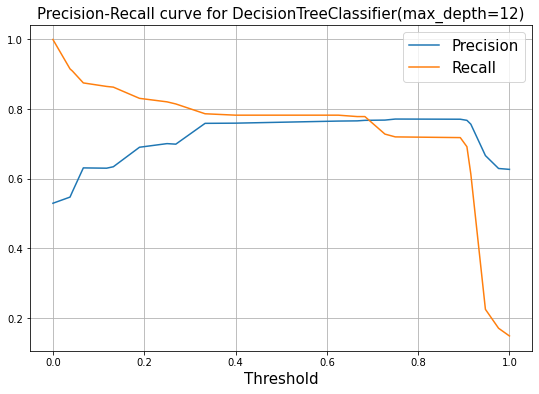

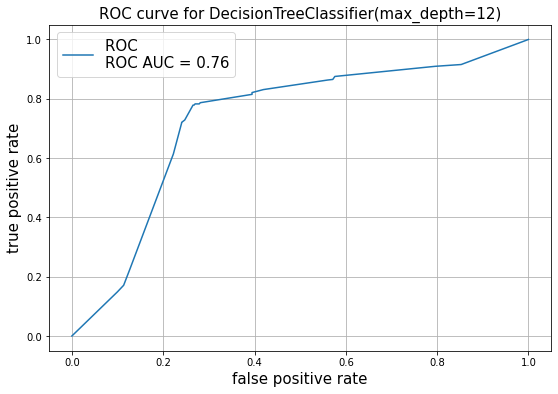

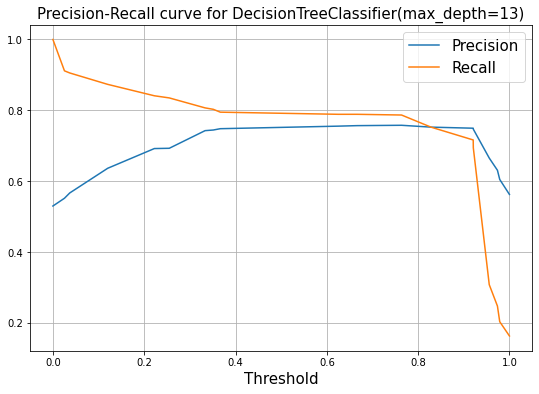

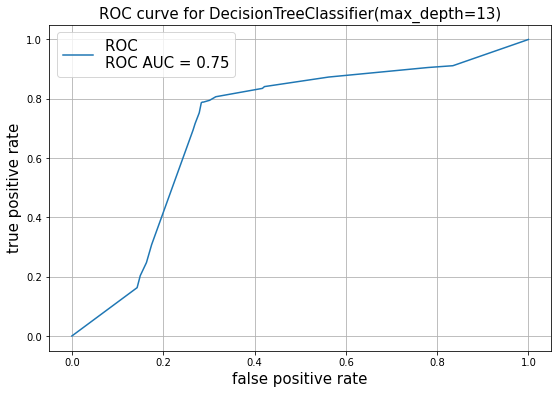

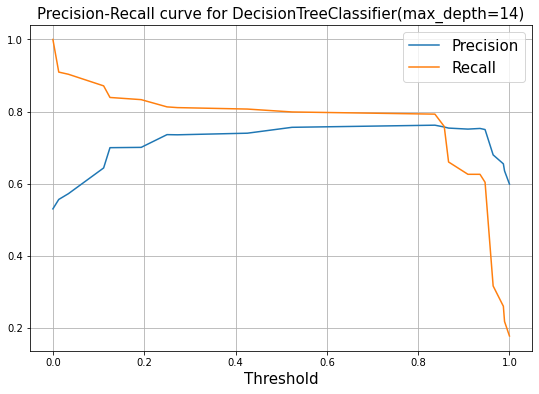

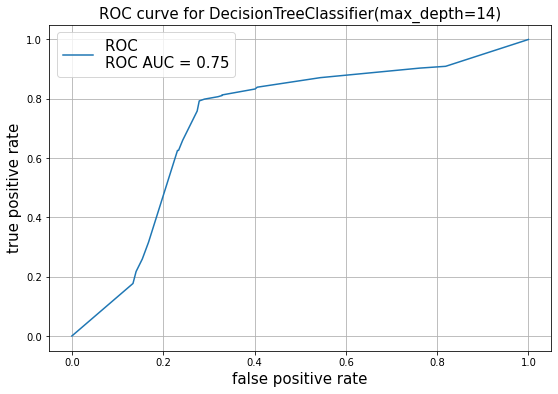

In [61]:
trees = []
for d in range(1, 15):
    d_tree = DecisionTreeClassifier(max_depth=d)
    d_tree = d_tree.fit(X_train, y_train)
    trees.append(d_tree)
    
classify(trees, X_test, y_test)

In [ ]:
"""
Таким образом, максимального значение recall (а значит уменьшение значения False Negative) получается
при использовании дерева решения глубина 2 (значение recall = 0.84)
"""